In [ ]:
## Beginning

In [1]:
%matplotlib inline
import matplotlib
import os              # This provides several system utilities
import pandas as pd    # This is the workhorse of data munging in Python
import numpy as np     # This is for general numerical operations 
import seaborn as sns  # This allows us to efficiently and beautifully plot
import networkx as nx  
import osmnx as ox
import statsmodels.api as sm
import matplotlib.pyplot as plt

# display settings (optional)
pd.set_option("display.max_columns", 50)
pd.set_option("display.width", 120)

In [3]:
#for the import process, next step is to create a string variable containing the directory of the file and a file name variable
infodir = r'C:\Users\EPRO\OneDrive - Wageningen University & Research\Course Channel Metropolitan Challenges 2025 - Paper Group 6 Parking space vs Food Space'
fname = infodir + r'\data\buurten_filtered.csv'

gpdf01 = pd.read_csv(fname)
#this is to verify
gpdf01.head()

,OBJECTNUMMER,BRT,SDC,Periode,Dagdeel,Cap_open,Bez_open,Fout,Object,Bez_tot,Netto_PKD,Bruto_PKD,WKT_LNG_LAT,WKT_LAT_LNG,LNG,LAT
0,117.0,AA01 Planciusbuurt-Noord,A,202403-202404,doordeweeks avond,55.0,52.0,3.0,0.0,55.0,95.0,100.0,"POLYGON((4.8857454 52.3881665,4.8844789 52.388...","POLYGON((52.3881665 4.8857454,52.3883785 4.884...",4.884390,52.387023
1,118.0,AA02 Westelijke eilanden,A,202403-202404,doordeweeks avond,313.0,287.0,9.0,0.0,296.0,92.0,95.0,"POLYGON((4.8910092 52.3884398,4.8859714 52.388...","POLYGON((52.3884398 4.8910092,52.3881287 4.885...",4.887548,52.385401
2,119.0,AA03 Westerdokseiland,A,202403-202404,doordeweeks avond,165.0,76.0,0.0,0.0,76.0,46.0,46.0,"POLYGON((4.8950776 52.3886909,4.8923612 52.388...","POLYGON((52.3886909 4.8950776,52.3885233 4.892...",4.894474,52.384417
3,120.0,AA04 Planciusbuurt-Zuid,A,202403-202404,doordeweeks avond,20.0,15.0,1.0,0.0,16.0,75.0,80.0,"POLYGON((4.8839232 52.385505,4.884072 52.38566...","POLYGON((52.385505 4.8839232,52.3856666 4.8840...",4.882867,52.384947
4,121.0,AA05 Haarlemmerbuurt-West,A,202403-202404,doordeweeks avond,148.0,141.0,4.0,0.0,145.0,95.0,98.0,"POLYGON((4.8839232 52.385505,4.8835118 52.3849...","POLYGON((52.385505 4.8839232,52.3849538 4.8835...",4.886377,52.383013


In [8]:
gpdf01_1 = gpdf01[gpdf01['Dagdeel'] == 'doordeweeks avond']
before = len(gpdf01)
after = len(gpdf01_1)
print(f"Rows before: {before}, after: {after}, dropped: {before - after}")

Rows before: 1447, after: 518, dropped: 929


In [30]:
gpdf01_2 = gpdf01_1[(gpdf01_1["Netto_PKD"] <= 150) & (gpdf01_1["Bruto_PKD"] <= 150)]
gpdf01_2 = gpdf01_2.sort_values(by=["Bruto_PKD", "Netto_PKD"], ascending=[False, False])
gpdf01_2.head(10)

,OBJECTNUMMER,BRT,SDC,Periode,Dagdeel,Cap_open,Bez_open,Fout,Object,Bez_tot,Netto_PKD,Bruto_PKD,WKT_LNG_LAT,WKT_LAT_LNG,LNG,LAT,AA_buurten
26,143.0,AE02 Oude Kerk e.o.,A,202301-202302,doordeweeks avond,8.0,7.0,2.0,0.0,9.0,88.0,112.0,"POLYGON((4.8994004 52.3747475,4.8992273 52.374...","POLYGON((52.3747475 4.8994004,52.3747876 4.899...",4.896203,52.373811,AE
97,384.0,TH04 K-buurt-Zuidwest,T,202406,doordeweeks avond,358.0,340.0,57.0,0.0,397.0,95.0,111.0,"POLYGON((4.9803772 52.3155975,4.9801227 52.315...","POLYGON((52.3155975 4.9803772,52.3155437 4.980...",4.979595,52.313042,TH
98,385.0,TH05 K-buurt-Zuidoost,T,202406,doordeweeks avond,327.0,302.0,46.0,0.0,348.0,92.0,106.0,"POLYGON((4.9859463 52.3173694,4.9854452 52.317...","POLYGON((52.3173694 4.9859463,52.3172527 4.985...",4.984753,52.314853,TH
87,374.0,TE03 G-buurt-Noord,T,202406,doordeweeks avond,320.0,306.0,29.0,0.0,335.0,96.0,105.0,"POLYGON((4.9714808 52.3253526,4.9706196 52.325...","POLYGON((52.3253526 4.9714808,52.3250574 4.970...",4.970181,52.323912,TE
89,376.0,TF02 Grunder/Koningshoef,T,202406,doordeweeks avond,425.0,416.0,24.0,0.0,440.0,98.0,104.0,"POLYGON((4.9769028 52.3238067,4.977699 52.3229...","POLYGON((52.3238067 4.9769028,52.3229333 4.977...",4.980608,52.321355,TF
157,563.0,EG02 GWL-terrein,E,202409-202410,doordeweeks avond,38.0,39.0,0.0,0.0,39.0,103.0,103.0,"POLYGON((4.8694074 52.3855428,4.8668659 52.385...","POLYGON((52.3855428 4.8694074,52.3854968 4.866...",4.868767,52.383811,EG
281,1032.0,FB07 Bakemabuurt,F,202409-202411,doordeweeks avond,533.0,513.0,24.0,0.0,537.0,96.0,101.0,"POLYGON((4.8093999 52.3793915,4.8094205 52.379...","POLYGON((52.3793915 4.8093999,52.379517 4.8094...",4.805575,52.378331,FB
70,357.0,TA03 Amstel III deel A/B-Noord,T,202406,doordeweeks avond,4.0,4.0,0.0,0.0,4.0,100.0,100.0,"POLYGON((4.9475058 52.3108069,4.9463557 52.312...","POLYGON((52.3108069 4.9475058,52.3120613 4.946...",4.946693,52.305855,TA
139,545.0,EB08 Zeeheldenbuurt,E,202409-202410,doordeweeks avond,212.0,205.0,7.0,0.0,212.0,97.0,100.0,"POLYGON((4.8856593 52.3907556,4.8855179 52.390...","POLYGON((52.3907556 4.8856593,52.3904709 4.885...",4.888207,52.389442,EB
0,117.0,AA01 Planciusbuurt-Noord,A,202403-202404,doordeweeks avond,55.0,52.0,3.0,0.0,55.0,95.0,100.0,"POLYGON((4.8857454 52.3881665,4.8844789 52.388...","POLYGON((52.3881665 4.8857454,52.3883785 4.884...",4.884390,52.387023,AA


In [9]:
gpdf01_1["AA_buurten"] = gpdf01_1["BRT"].str[:2]
df_avg1 = gpdf01_1.groupby("AA_buurten", as_index=False).mean(numeric_only=True)
df_avg1.head(10)

C:\Users\EPRO\AppData\Local\Temp\ipykernel_24748\4049047171.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gpdf01_1["AA_buurten"] = gpdf01_1["BRT"].str[:2]


,AA_buurten,OBJECTNUMMER,Cap_open,Bez_open,Fout,Object,Bez_tot,Netto_PKD,Bruto_PKD,LNG,LAT
0,AA,119.500,137.000000,113.500000,3.000000,0.0,116.500000,82.333333,85.166667,4.887962,52.384230
1,AB,128.000,146.818182,121.727273,1.363636,0.0,123.090909,83.454545,84.818182,4.880027,52.374351
2,AC,135.500,230.250000,176.250000,0.250000,0.0,176.500000,79.750000,79.750000,4.887063,52.373264
3,AD,245.375,25.750000,17.750000,0.625000,0.0,18.375000,5581.500000,5582.000000,4.893645,52.374255
4,AE,184.800,19.400000,15.600000,1.600000,0.0,17.200000,1836.200000,1844.000000,4.896888,52.372574
5,AF,150.000,85.333333,60.000000,2.333333,0.0,62.333333,67.111111,69.888889,4.904784,52.371775
6,AG,157.500,145.500000,114.166667,0.666667,0.0,114.833333,73.500000,75.333333,4.892159,52.365177
7,AH,164.500,119.125000,97.500000,1.250000,0.0,98.750000,81.625000,82.750000,4.889498,52.362195
8,AJ,170.500,339.500000,244.750000,2.250000,0.0,247.000000,73.000000,73.500000,4.912912,52.363930
9,AK,176.500,238.375000,187.500000,0.625000,0.0,188.125000,78.000000,78.000000,4.923073,52.370187


In [31]:
gpdf01_2["AA_buurten"] = gpdf01_2["BRT"].str[:2]
df_avg2 = (
    gpdf01_2
    .groupby("AA_buurten", as_index=False)
    .agg({
        'SDC': lambda x: x.mode().iloc[0] if not x.mode().empty else None,
        'Periode': lambda x: x.mode().iloc[0] if not x.mode().empty else None,
        'Dagdeel': lambda x: x.mode().iloc[0] if not x.mode().empty else None,
        'Cap_open': 'mean',
        'Bez_open': 'mean',
        'Fout': 'mean',
        'Bez_tot': 'mean',
        'Netto_PKD': 'mean',
        'Bruto_PKD': 'mean',        
    })
)
df_avg2.head(10)

,AA_buurten,SDC,Periode,Dagdeel,Cap_open,Bez_open,Fout,Bez_tot,Netto_PKD,Bruto_PKD
0,AA,A,202403-202404,doordeweeks avond,137.000000,113.500000,3.000000,116.500000,82.333333,85.166667
1,AB,A,202403-202404,doordeweeks avond,146.818182,121.727273,1.363636,123.090909,83.454545,84.818182
2,AC,A,202403-202404,doordeweeks avond,230.250000,176.250000,0.250000,176.500000,79.750000,79.750000
3,AD,A,202403-202404,doordeweeks avond,68.666667,47.333333,1.000000,48.333333,70.666667,72.000000
4,AE,A,202403-202404,doordeweeks avond,24.250000,19.500000,2.000000,21.500000,73.250000,83.000000
5,AF,A,202403-202404,doordeweeks avond,85.333333,60.000000,2.333333,62.333333,67.111111,69.888889
6,AG,A,202403-202404,doordeweeks avond,145.500000,114.166667,0.666667,114.833333,73.500000,75.333333
7,AH,A,202403-202404,doordeweeks avond,119.125000,97.500000,1.250000,98.750000,81.625000,82.750000
8,AJ,A,202403-202404,doordeweeks avond,339.500000,244.750000,2.250000,247.000000,73.000000,73.500000
9,AK,A,202403-202404,doordeweeks avond,238.375000,187.500000,0.625000,188.125000,78.000000,78.000000


In [32]:
df_avg2 = df_avg2.sort_values(by=["Bruto_PKD", "Fout"], ascending=[True, False])
df_avg2.head(10)

,AA_buurten,SDC,Periode,Dagdeel,Cap_open,Bez_open,Fout,Bez_tot,Netto_PKD,Bruto_PKD
11,BB,B,202406,doordeweeks avond,77.200000,7.800000,0.000000,7.800000,9.800000,9.800000
12,EA,E,202409-202410,doordeweeks avond,616.666667,74.333333,1.333333,75.666667,14.333333,14.666667
10,BA,B,202406,doordeweeks avond,105.500000,19.666667,1.333333,21.000000,17.833333,19.333333
72,MK,M,202501-202503,doordeweeks avond,168.000000,21.500000,1.500000,23.000000,19.500000,21.000000
107,TK,T,202406,doordeweeks avond,191.333333,34.000000,2.000000,36.000000,22.333333,24.000000
59,KN,K,202502-202503,doordeweeks avond,1096.000000,329.000000,1.000000,330.000000,30.000000,30.000000
70,MH,M,202501-202503,doordeweeks avond,158.666667,65.333333,1.166667,66.500000,29.500000,30.166667
62,KR,K,202502-202503,doordeweeks avond,1254.250000,483.750000,4.250000,488.000000,31.750000,32.000000
37,FF,F,202409-202411,doordeweeks avond,391.666667,122.666667,3.666667,126.333333,29.000000,32.000000
61,KQ,K,202502-202503,doordeweeks avond,1178.500000,552.166667,7.833333,560.000000,32.833333,33.166667


In [33]:
df_avg2 = df_avg2.sort_values(by=["Bruto_PKD", "Fout"], ascending=[False, True])
df_avg2.head(10)

,AA_buurten,SDC,Periode,Dagdeel,Cap_open,Bez_open,Fout,Bez_tot,Netto_PKD,Bruto_PKD
102,TE,T,202406,doordeweeks avond,720.666667,622.000000,48.000000,670.000000,88.666667,97.000000
52,KF,K,202502-202503,doordeweeks avond,399.000000,374.750000,3.000000,377.750000,94.250000,94.750000
105,TH,T,202406,doordeweeks avond,390.600000,333.000000,30.200000,363.200000,84.400000,94.600000
35,FD,F,202409-202411,doordeweeks avond,707.750000,594.250000,51.750000,646.000000,84.000000,91.500000
25,EP,E,202409-202410,doordeweeks avond,244.000000,213.500000,4.500000,218.000000,87.000000,89.000000
104,TG,T,202406,doordeweeks avond,542.666667,461.666667,12.666667,474.333333,85.333333,87.666667
24,EN,E,202409-202410,doordeweeks avond,205.000000,178.250000,0.500000,178.750000,86.500000,86.750000
29,ET,E,202409-202410,doordeweeks avond,608.500000,517.500000,2.000000,519.500000,86.500000,86.500000
17,EF,E,202409-202410,doordeweeks avond,587.000000,498.000000,2.500000,500.500000,86.500000,86.500000
26,EQ,E,202409-202410,doordeweeks avond,737.000000,631.000000,5.000000,636.000000,86.000000,86.000000


In [ ]:
#comparing these two results, the neighborhoods where we should focus for our surveys, at this moment, are:
#BB and TE
#however, we need to add the criteria for green area and other variables before confirming this decision

In [25]:
display(df_avg2.describe(include="all"))
df_avg2.isna().sum()

,AA_buurten,SDC,Periode,Dagdeel,Cap_open,Bez_open,Fout,Bez_tot,Netto_PKD,Bruto_PKD
count,110,110,110,110,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000
unique,110,9,9,1,NaN,NaN,NaN,NaN,NaN,NaN
top,EA,E,202409-202410,doordeweeks avond,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,20,20,110,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,504.147421,345.177136,9.426843,354.603979,433.849084,436.201452
std,NaN,NaN,NaN,NaN,334.888811,240.206558,14.047430,249.057390,1084.331634,1083.964738
min,NaN,NaN,NaN,NaN,19.400000,4.875000,0.000000,4.875000,14.333333,14.666667
25%,NaN,NaN,NaN,NaN,241.107143,165.275000,1.687500,167.875000,63.508333,65.250000
50%,NaN,NaN,NaN,NaN,432.839286,300.089286,4.208333,310.125000,74.625000,76.500000
75%,NaN,NaN,NaN,NaN,674.000000,494.937500,10.175000,500.875000,84.000000,85.000000


AA_buurten    0
SDC           0
Periode       0
Dagdeel       0
Cap_open      0
Bez_open      0
Fout          0
Bez_tot       0
Netto_PKD     0
Bruto_PKD     0
dtype: int64

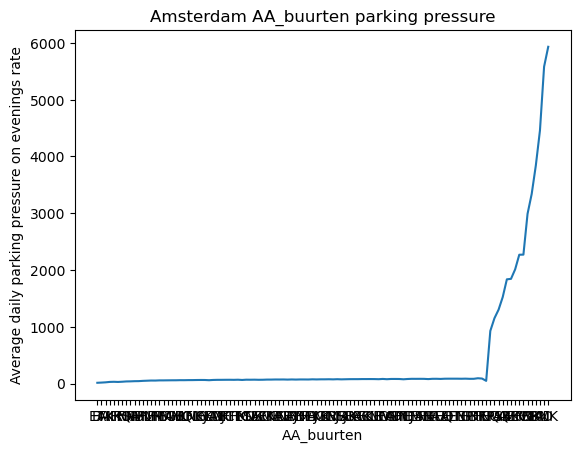

In [27]:
plt.figure()
plt.plot(df_avg2["AA_buurten"], df_avg2["Netto_PKD"])
plt.xlabel("AA_buurten")
plt.ylabel("Average daily parking pressure on evenings rate")
plt.title("Amsterdam AA_buurten parking pressure")
plt.show()

In [ ]:
lt.figure()
plt.plot(df_avg2["Periode"], df_avg2["Netto_PKD"])
plt.xlabel("Date")
plt.ylabel("Daily parking pressure on evenings rate")
plt.title("Amsterdam parking pressure over time")
plt.show()

In [13]:
gpdf01_1["Periode"].dtype

dtype('O')

In [14]:
gpdf01_1["Periode"] = gpdf01["Periode"].fillna("").astype(str)

C:\Users\EPRO\AppData\Local\Temp\ipykernel_24748\1587416296.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gpdf01_1["Periode"] = gpdf01["Periode"].fillna("").astype(str)


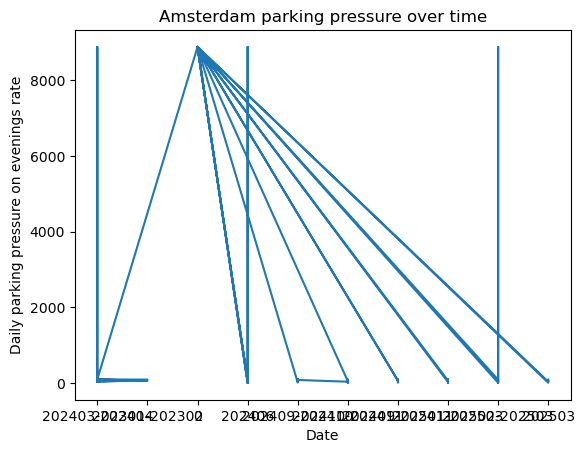

In [15]:
plt.figure()
plt.plot(gpdf01_1["Periode"], gpdf01_1["Netto_PKD"])
plt.xlabel("Date")
plt.ylabel("Daily parking pressure on evenings rate")
plt.title("Amsterdam parking pressure over time")
plt.show()

In [16]:
# 1) Add constant
X = sm.add_constant(gpdf01_1[["tmax"]])
y = gpdf01_1["bikes"]

# 2) Fit model
model_simple = sm.OLS(y, X).fit()

# 3) Inspect results
print(model_simple.summary())


KeyError: "None of [Index(['tmax'], dtype='object')] are in the [columns]"